## Tema

#### Clasificación de superficies geográficas


## Título de proyecto

#### Proyecto de Machine Learning: Clasificación de superfícies geográficas reconocidas por vía satelital


## Datasets

#### Link de Dataset de partida: http://madm.dfki.de/downloads

#### El dataset que se trabaja en este proyecto contiene 27000 imágenes terrestres y geolocalizables del satélite Sentinel-2, de acceso público y aportadas por el programa Europeo de observación Copernicus.


In [37]:
#Primero se ejecutan las importaciones a las librerías con las que se trabaja el archivo main.ipynb.

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from utils.mysql_tb import MySQL, connect_mysql

import utils.visualization_tb as vi
import utils.mining_data_tb as mn
import utils.folders_tb as fol
import utils.models_tb as mo
from utils.mysql_tb import MySQL, connect_mysql

from sklearn.model_selection import train_test_split

import os
import shutil

from sqlalchemy import create_engine

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
#Para este proyecto se comprueba que se ha utilizado la versión de tensorflow 2.5.0

print("Versión de tensorflow:",tf.__version__)

Versión de tensorflow: 2.5.0


In [3]:
#Se asignan los parámetros base con los que se van a ejecutar los parámetros de visualización.

vi.sns_gstyle()
%matplotlib inline

In [4]:
#El dataset con el que se trabaja en este proyecto se encuentra en "data/downloads/sentinel_2".

ds_dir = ".." + os.sep + "data" + os.sep + "downloads" + os.sep + "sentinel_2"

In [5]:
#Lo primero que se va a hacer es, desde la ruta del archivo descargado, importar los nombres de las distintas carpetas que clasifican las imágenes descargadas. 

#AVISO: Esta celda solo tiene que ser ejecutada una única vez. En este caso de trabajo, ya ha sido ejecutada, por lo que no se recomienda volver a ejecutar para su óptima visualización, no obstante, no generará cambios en el resto del proyecto ya que genera una variable con la que no se va a trabajar.

os.listdir(ds_dir)

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [6]:
#Como las carpetas corresponden con las clases que se van a trabajar, se les cambia el nombre a español. De esta manera, las visualizaciones serán más comprensibles para el público.

#Para ello se elabora una traducción manual de las palabras que definen las carpetas.

folder_names_list = ['cultivo_transitorio','bosque','vegetacion_herbacea', 'carretera', 'industrial', 'pasto', 'cultivo_permanente', 'residencial','rio','lago_mar']

#AVISO: Esta celda solo tiene que ser ejecutada una única vez. En este caso de trabajo, ya ha sido ejecutada, por lo que no se recomienda volver a ejecutar para su óptima visualización. Si se vuelve a ejecutar, dará lugar a un error que no interferirá en los resultados ya que la función no hará ningun cambio sobre el contenido con el que se trabaja.

fol.rename_files(ds_dir, fol_names = folder_names_list)

Todos los nombres han sido sobreescritos exitosamente

Ejemplo resultante: bosque


In [7]:
#Se analiza los nombres de los archivos contenidos en las diferentes carpetas.

#AVISO: Esta celda solo tiene que ser ejecutada una única vez. En este caso de trabajo, ya ha sido ejecutada, por lo que no se recomienda volver a ejecutar para su óptima visualización, no obstante, no generará cambios en el resto del proyecto ya que genera una variable con la que no se va a trabajar.

fol.show_filenames(ds_dir)

Diez primeros archivos dentro de la carpeta bosque:

['Forest_1.jpg', 'Forest_10.jpg', 'Forest_100.jpg', 'Forest_1000.jpg', 'Forest_1001.jpg', 'Forest_1002.jpg', 'Forest_1003.jpg', 'Forest_1004.jpg', 'Forest_1005.jpg', 'Forest_1006.jpg']


Diez primeros archivos dentro de la carpeta carretera:

['Highway_1.jpg', 'Highway_10.jpg', 'Highway_100.jpg', 'Highway_1000.jpg', 'Highway_1001.jpg', 'Highway_1002.jpg', 'Highway_1003.jpg', 'Highway_1004.jpg', 'Highway_1005.jpg', 'Highway_1006.jpg']


Diez primeros archivos dentro de la carpeta cultivo_permanente:

['PermanentCrop_1.jpg', 'PermanentCrop_10.jpg', 'PermanentCrop_100.jpg', 'PermanentCrop_1000.jpg', 'PermanentCrop_1001.jpg', 'PermanentCrop_1002.jpg', 'PermanentCrop_1003.jpg', 'PermanentCrop_1004.jpg', 'PermanentCrop_1005.jpg', 'PermanentCrop_1006.jpg']


Diez primeros archivos dentro de la carpeta cultivo_transitorio:

['AnnualCrop_1.jpg', 'AnnualCrop_10.jpg', 'AnnualCrop_100.jpg', 'AnnualCrop_1000.jpg', 'AnnualCrop_1001.jpg', 'AnnualCr

In [8]:
#Como se puede observar, los nombres de las imágenes están compuestos por letras mayúsculas, letras minúsculas, guiones bajos y números, y con homogeneïdad entre ellos, es decir,siguiendo la misma pauta de estructuración y formación de los textos. Como se va a utilizar programario "case sensitive", se procede a cambiar los nombres de los archivos, en este caso, mayúsculas por minúsculas.

#AVISO: No se recomienda recorrer esta celda. La cantidad de archivos que hay que renombrar es muy elevada y puede dificultar el estudio de este proyecto. Los archivos se han cambiado mismamente sobre la carpeta de "downloads". De este modo, se evita generar copias que sobrecarguen de datos el proyecto, y para facilitar así, su almacenamiento y transmisión.

fol.rename_files(ds_dir, lower=True)

Todos los nombres han sido sobreescritos exitosamente

Ejemplo resultante: herbaceousvegetation_1.jpg


In [9]:
#Para evitar errores durante el procesado, se filtran las imágenes que puedan estar corruptas.

mn.delete_corrupted_images(folders=os.listdir(ds_dir), folders_dir=ds_dir)

Borradas 0 imágenes


In [10]:
#El dataset no contiene imágenes corruptas.

In [11]:
#Se analiza la cantidad de archivos que hay en cada carpeta. Si el reparto no es perceptiblemente homogéneo, se requerirán técnicas de aumentación de imágenes en el proyecto.

folders, len_values = fol.show_n_files(ds_dir)

En la carpeta bosque hay 3000 archivos
En la carpeta carretera hay 2500 archivos
En la carpeta cultivo_permanente hay 2500 archivos
En la carpeta cultivo_transitorio hay 3000 archivos
En la carpeta industrial hay 2500 archivos
En la carpeta lago_mar hay 3000 archivos
En la carpeta pasto hay 2000 archivos
En la carpeta residencial hay 3000 archivos
En la carpeta rio hay 2500 archivos
En la carpeta vegetacion_herbacea hay 3000 archivos


Mínimo y máximo de archivos en carpeta: 2000 y 3000


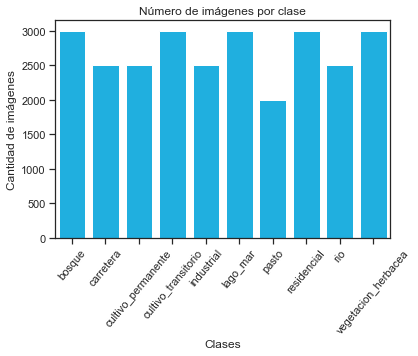

In [12]:
vi.visualize_countplot(folders, len_values, xlabel="Clases", ylabel="Cantidad de imágenes", title="Número de imágenes por clase", jpgname="n_files_per_folder")

In [13]:
#Los márgenes de distribución de imágenes por carpeta se presentan perceptiblemente homogéneos y aceptables, ya que proporcionalmente no hay mucha diferencia entre la cantidad máxima y mínima de impresiones. Por lo tanto, se decide no hacer data augmentation para este proyecto, ya que el margen de mejora, con tal cantidad de imágenes, y tanta homogeneidad entre los distintos labels, es bajo.

In [14]:
#Ahora que los datos han sido revisados y limpiados, se procede a organizarlos en sus correspondientes carpetas. 
#Primero se crean directorios con los mismos nombres que en downloads, pero en la sección data/test.

#AVISO: Esta celda solo tiene que ser ejecutada una única vez. En este caso de trabajo, ya ha sido ejecutada, por lo que no se recomienda volver a ejecutar para su óptima visualización. Si se vuelve a ejecutar, dará lugar a un error que no interferirá en los resultados ya que la función no hará ningun cambio sobre el contenido con el que se trabaja.

fol.create_test_train_folders(ds_dir)

Directorio bosque creado
Directorio carretera creado
Directorio cultivo_permanente creado
Directorio cultivo_transitorio creado
Directorio industrial creado
Directorio lago_mar creado
Directorio pasto creado
Directorio residencial creado
Directorio rio creado
Directorio vegetacion_herbacea creado
Directorio bosque creado
Directorio carretera creado
Directorio cultivo_permanente creado
Directorio cultivo_transitorio creado
Directorio industrial creado
Directorio lago_mar creado
Directorio pasto creado
Directorio residencial creado
Directorio rio creado
Directorio vegetacion_herbacea creado


In [15]:
#Segundo, se va a extraer del total de las carpetas un 20% de su contenido para utilizarlo como test y se integrarán en los correspondientes directorios creados previamente.

#AVISO: Esta celda solo tiene que ser ejecutada una única vez. En este caso de trabajo, ya ha sido ejecutada, por lo que no se recomienda volver a ejecutar para su óptima visualización.

fol.split_files(n=10,ds_dir=ds_dir)

Archivos de test de bosque correctamente transportados
Archivos de train de bosque correctamente transportados
Archivos de test de carretera correctamente transportados
Archivos de train de carretera correctamente transportados
Archivos de test de cultivo_permanente correctamente transportados
Archivos de train de cultivo_permanente correctamente transportados
Archivos de test de cultivo_transitorio correctamente transportados
Archivos de train de cultivo_transitorio correctamente transportados
Archivos de test de industrial correctamente transportados
Archivos de train de industrial correctamente transportados
Archivos de test de lago_mar correctamente transportados
Archivos de train de lago_mar correctamente transportados
Archivos de test de pasto correctamente transportados
Archivos de train de pasto correctamente transportados
Archivos de test de residencial correctamente transportados
Archivos de train de residencial correctamente transportados
Archivos de test de rio correctament

In [17]:
#Con las imágenes ya organizadas, se genera un conjunto de test y uno de entrenamiento con validación.

train_ds, val_ds, test_ds = mo.train_val_split_from_dir()

Conjunto de entrenamiento:
Found 24300 files belonging to 10 classes.
Using 19440 files for training.

Conjunto de validación:
Found 24300 files belonging to 10 classes.
Using 4860 files for validation.

Conjunto de test:
Found 2700 files belonging to 10 classes.


In [18]:
#Como se muestra a contiuación, "train_ds" es un Dataset de tensorflow con batches de 32.
train_ds

<BatchDataset shapes: ((None, 64, 64, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [21]:
#Igual que se cogió el directorio del dataset una vez descargado para procesar (ds_dir), se coge el directorio del dataset de entrenamiento.
train_dir = ".." + os.sep + "data" + os.sep + "train"

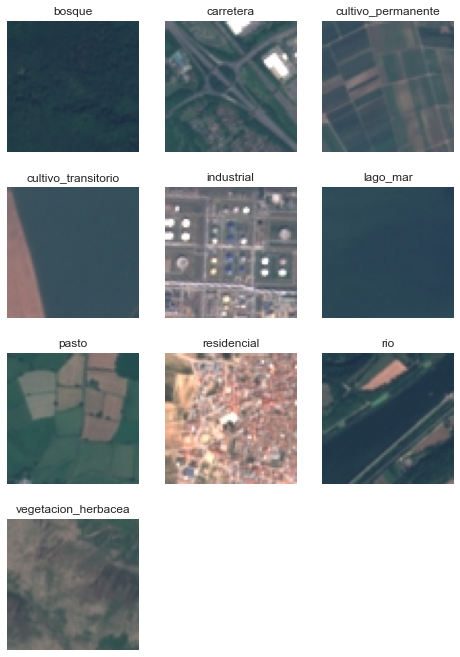

In [24]:
#Se visualiza la data con la librería matplotlib.pyplot. En este caso, como tardaría mucho en reproducir todos los valores y sus clases, se coge 1 valor de cada clase para poder identificar como se trabajan las imágenes con sus respectivas clases.

vi.imageset_intro_vis(download_folders=os.listdir(train_dir), ds_path=train_dir)

In [17]:
#A ojo humano, las imágenes corresponden con la clasificación de training.

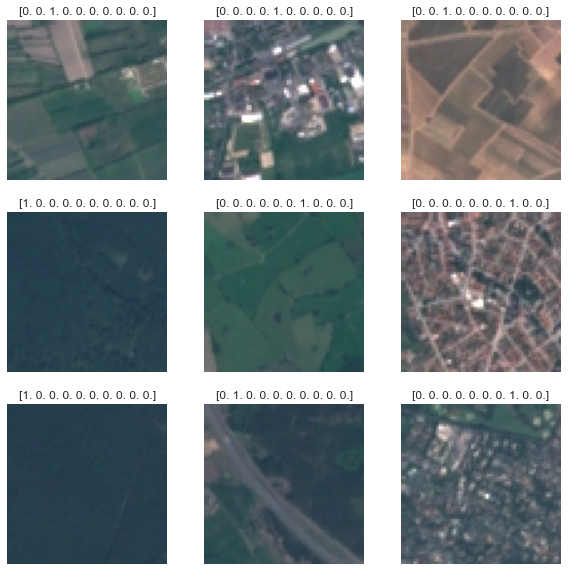

In [23]:
#Con tensorflow, se guardan dichas clases como labels en arrays de 10 de longitud, correspondiendo a las 10 clases que habían originalmente. En este paso, se muestra como cada imágen se corresponde con un label (target) particular.

vi.labels_intro_vis(download_folders=os.listdir(train_dir), training=train_ds)

In [25]:
#Ahora que la data está organizada y se han establecido los conjuntos de train y validation, se procede a la creación de modelos. 

#Este proyecto trabaja con clasificación y segmentación de imágenes obtenidas por visión artificial, por este motivo se pondrán a prueba modelos de red neuronal convolucional (CNN).

#El primer paso para el modelo, es reescalar los valores de color a 0-1. Esto se debe a que los modelos de convolución de neuronas trabajan mejor con valores que se encuentran en este intervalo, y la gama cromática "rgb" ofrece valores del 1 al 255. Por este motivo, y para no afectar al BatchDataset, se aplica primero una capa de reescalado de los valores de color.

cnn_model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255),
    layers.Conv2D(64, (3, 3), padding="same",input_shape=(64, 64, 1),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation="softmax")
])

In [42]:
#A continuación, se estipulan los parámetros de compilación para el modelo que se entrena. Estos parámetros son uniformes para los distintos modelos de red neuronal convolucional que se van a estudiar, ya que, están adecuados al tipo de red que se pretenden trabajar y a los resultados que se quieren obtener.

#Optimizer: de inicio se prueba con el optimizador adam, que es una de los optimizadores más populares que ofrece keras, y se probarán también otros algorítmos para los distintos modelos.

#Loss: se utiliza el "categorical_crossentropy" porque se trabaja con más de 2 "labels" y con formato "one-hot encoder", es decir, con arrays de 0 y 1.

#Metrics: se aplica "accuracy" o precisión porque mide la capacidad del modelo de acertar, en porcentaje, y nos otorga un resultado de éxito.

cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
#Se aplica un callback de "EarlyStopping" para evitar que un exceso de repetición de épocas resulte en overfitting. Como tampoco se le da un número muy elevado de épocas, por conveniencia del tiempo de trabajo disponible en el proyecto, la paciencia asignada a este "EarlyStopping" será de 3. También, se habilita el parámetro de "restore_best_weights" para recoger el número de épocas en que el modelo ha sido mejor entrenado entre las 3 últimas épocas que estipula la paciencia. Este callback, será utilizado para todos los modelos de entrenamiento.

callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [28]:
#Se entrena el modelo
history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[callback])

Epoch 1/30
608/608 [==============================] - 56s 91ms/step - loss: 1.4247 - accuracy: 0.4826 - val_loss: 1.1099 - val_accuracy: 0.5823
Epoch 2/30
608/608 [==============================] - 55s 91ms/step - loss: 0.9701 - accuracy: 0.6498 - val_loss: 0.8985 - val_accuracy: 0.6710
Epoch 3/30
608/608 [==============================] - 55s 91ms/step - loss: 0.8057 - accuracy: 0.7123 - val_loss: 0.7889 - val_accuracy: 0.7152
Epoch 4/30
608/608 [==============================] - 57s 94ms/step - loss: 0.7083 - accuracy: 0.7470 - val_loss: 0.7339 - val_accuracy: 0.7395
Epoch 5/30
608/608 [==============================] - 56s 92ms/step - loss: 0.6350 - accuracy: 0.7772 - val_loss: 0.7117 - val_accuracy: 0.7432
Epoch 6/30
608/608 [==============================] - 56s 92ms/step - loss: 0.5830 - accuracy: 0.7915 - val_loss: 0.6563 - val_accuracy: 0.7642
Epoch 7/30
608/608 [==============================] - 56s 92ms/step - loss: 0.5330 - accuracy: 0.8085 - val_loss: 0.7594 - val_accuracy:

In [ ]:
history_2 = cnn_model_2.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[callback])

In [65]:
#Con la función summary, se muestra un esquema de la red neuronal que se ha creado.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8388736   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 8,391,818
Trainable params: 8,391,818
Non-trainable params: 0
______________________________________________

In [29]:
#Se evalua el modelo con el conjunto de test.

cnn_model.evaluate(test_ds)

85/85 [==============================] - 2s 24ms/step - loss: 0.6284 - accuracy: 0.7815


[0.6283897757530212, 0.7814815044403076]

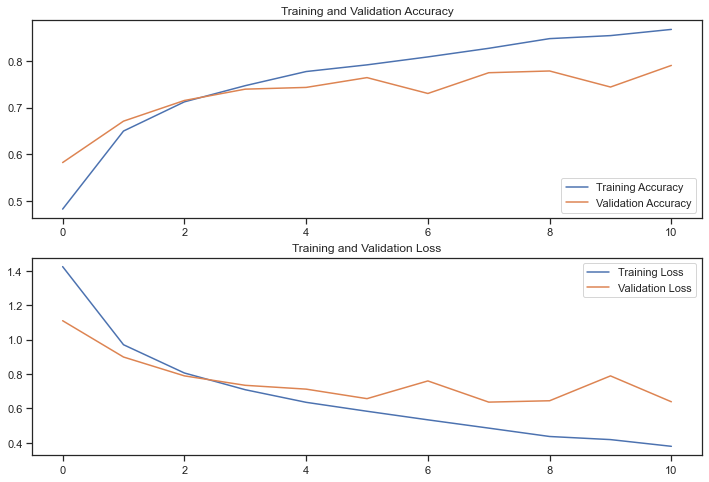

<Figure size 432x288 with 0 Axes>

In [31]:
#Se muestra por pantalla una visualización de la evolución de la precisión y del loss, de entrenamiento y validación, a lo largo de las épocas.

vi.accuracy_evolution_vis(model_history = history)

In [32]:
#Se guarda el modelo en la carpeta principal "models"

mo.save_model(path="models" + os.sep, model=cnn_model_1, model_filename="model1.h5")

El modelo ha sido guardado correctamente


In [43]:
cnn_model_2 = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255),
    layers.Conv2D(64, kernel_size=(3, 3), input_shape=(64, 64, 1), padding='same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(3, 3), padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [46]:
cnn_model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history_2 = cnn_model_2.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[callback])

Epoch 1/30
608/608 [==============================] - 80s 132ms/step - loss: 8.2112 - accuracy: 0.0917 - val_loss: 7.8501 - val_accuracy: 0.0977
Epoch 2/30
608/608 [==============================] - 79s 129ms/step - loss: 8.2133 - accuracy: 0.0913 - val_loss: 7.8501 - val_accuracy: 0.0977
Epoch 3/30
608/608 [==============================] - 78s 128ms/step - loss: 8.1809 - accuracy: 0.0913 - val_loss: 7.8501 - val_accuracy: 0.0977
Epoch 4/30
608/608 [==============================] - 78s 128ms/step - loss: 8.2390 - accuracy: 0.0913 - val_loss: 7.8501 - val_accuracy: 0.0977
Epoch 5/30
608/608 [==============================] - 78s 128ms/step - loss: 8.0831 - accuracy: 0.0913 - val_loss: 7.8501 - val_accuracy: 0.0977
Epoch 6/30
608/608 [==============================] - 79s 130ms/step - loss: 8.1196 - accuracy: 0.0913 - val_loss: 7.8501 - val_accuracy: 0.0977


In [23]:
#Se guarda una segunda copia .json en otra ruta para trabajar en el notebook.
fol.create_json(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "cleaned_data.json", data)

In [24]:
#Se sube una copia del dataframe al servidor de MySQL propuesto para el proyecto. Primero, se establece la conexión con el servidor, que vendrá apoyada con la funcionalidad del módulo mysql_tb en la que se encuentra la clase MYSQL.
db_connection = connect_mysql(IP_DNS="54.87.229.244", USER="21755015m", PASSWORD="adriagallardo96", BD_NAME="21755015m_ds_april_2021_db", PORT=25001)

Connected to MySQL server [21755015m_ds_april_2021_db]


In [25]:
#Por consiguiente, se sube el DataFrame al servidor.
data.to_sql(name="21755015m_ds_april_2021_db_tb", con=db_connection, if_exists="replace", index=False)

In [26]:
#Finalmente, se comprueba que se haya subido correctamente con una lectura del DataFrame

pd.read_sql_table("21755015m_ds_april_2021_db_tb", db_connection)

,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,freetime,goout,absences,alcohol,grade
0,F,18,U,GT3,A,4,4,course,mother,2,...,yes,yes,no,no,4,3,4,6,2,17
1,F,17,U,GT3,T,1,1,course,father,1,...,no,yes,yes,no,5,3,3,4,2,16
2,F,15,U,LE3,T,1,1,other,mother,1,...,yes,yes,yes,no,4,3,2,10,5,25
3,F,15,U,GT3,T,4,2,home,mother,1,...,yes,yes,yes,yes,3,2,2,2,2,44
4,F,16,U,GT3,T,3,3,home,father,1,...,yes,yes,no,no,4,3,2,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,F,19,R,GT3,T,2,3,course,mother,1,...,no,yes,yes,no,5,4,2,4,3,31
1011,F,18,U,LE3,T,3,1,course,mother,1,...,yes,yes,yes,no,4,3,4,4,2,46
1012,F,18,U,GT3,T,1,1,course,mother,2,...,yes,yes,no,no,1,1,1,6,2,32
1013,M,17,U,LE3,T,3,1,course,mother,2,...,no,yes,yes,no,2,4,5,6,7,30


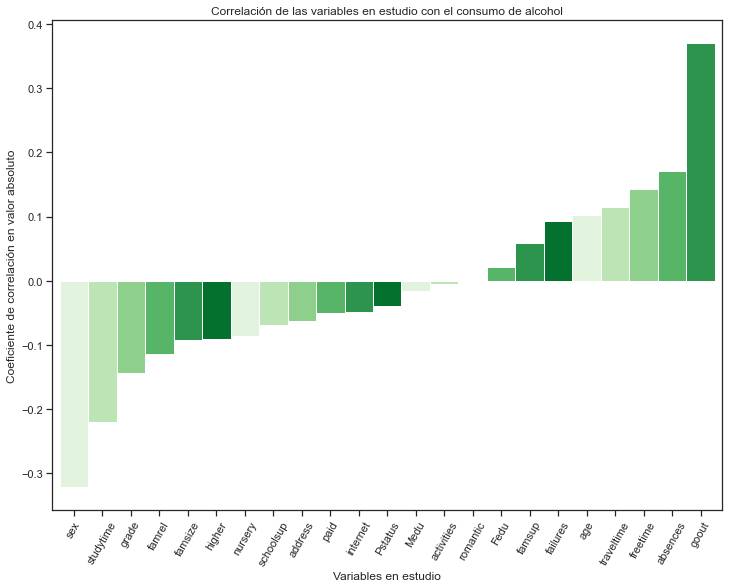

In [31]:
#A continuación se muestran también las correlaciones negativas para asegurar que no se tratan los parámetros al contrario de como se debería.

vi.corr_onevalue_graphic_n(data=correlation_alc, variable = "el consumo de alcohol")
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "correlation_alcohol.jpg")


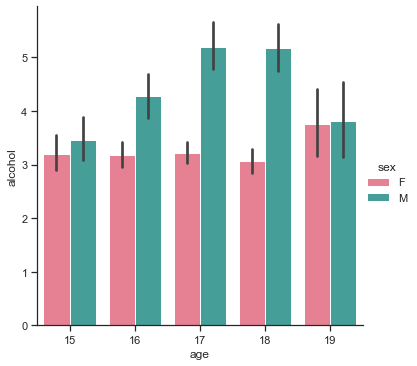

In [32]:
#En la hipotesis, se plantea que los factores determinados parentalmente, son los que más afectación tienen sobre el alumno a la hora de consumir alcohol. Sin embargo, se muestra una excepción, el sexo. Debido a esto, se genera la siguiente cuestión ¿Por que el sexo diferencia tanto a los alumnos con la ingesta de alcohol?
sns.catplot(data=data, x="age", y="alcohol", kind="bar", hue="sex", palette="husl")
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "alcohol_age.jpg")


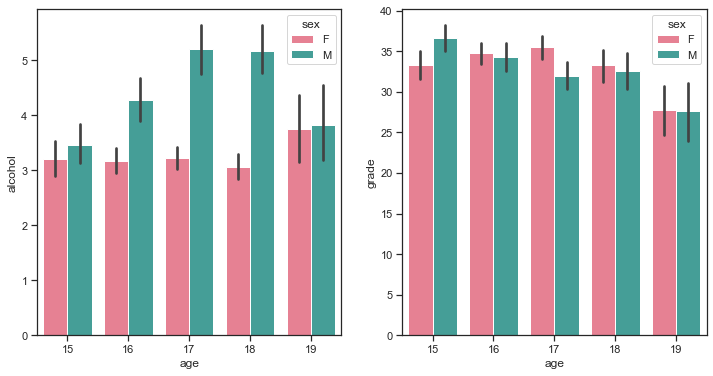

In [33]:
#Como se puede observar, el sexo no influye considerablemente sobre la nota, pero sí sobre la tendencia que dirige el consumo de alcohol con la edad. Y se puede ver simultaneamente, con el sexo masculino, para las edades determinadas, que cuando incrementan considerablemente los valores de consumo de alcohol, disminuye la nota de los sujetos del sexo masculino en contraposición a los sujetos femeninos. Por este motivo, como el sexo presenta valores tan dispares a la hora de estudiar las correlaciones con el alcohol, se realizará un estudio para ambos casos de sexo, para determinar si la correlación de sexo se aplica como factor biológico, o hay factores sociológicos que diferencian ambos sexos.

vi.doble_barplot(x="age", y1="alcohol", y2="grade", hue="sex", figsize=(12,6), data=data )
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "alcohol_grade_age.jpg")

#En el camino que se sigue, se pueden obtener 2 conclusiones: que el sexo sea un factor biológico determinante en el consumo de alcohol porque los sujetos masulinos o femeninos tienen más "apetito" por él, o que el sexo determine patrones sociológicos que resulten en generar una mayor correlación sobre la ingesta de acohol, en cuyo caso, podríamos determinar que también son medidas sistemáticas educacionales que desembocan en este resultado de dispariedad.


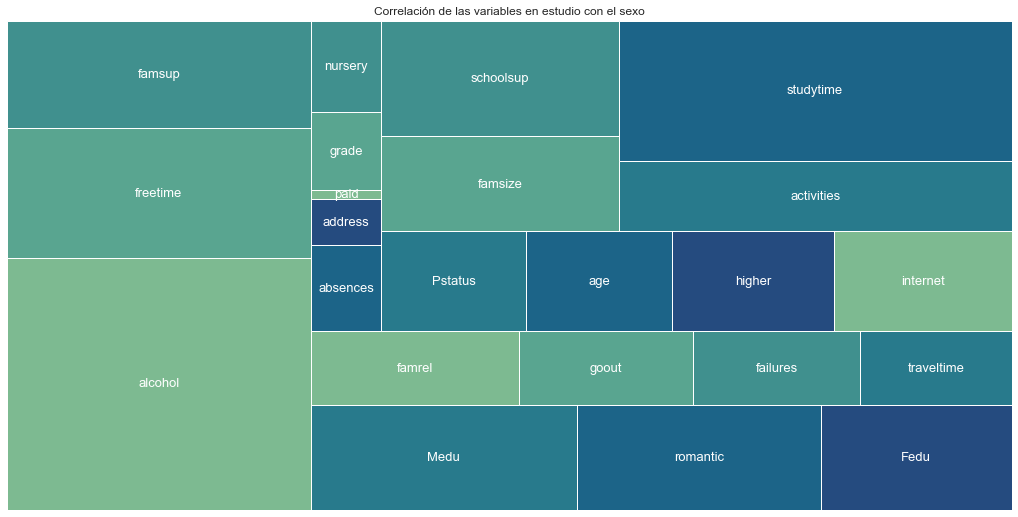

In [34]:
#Para verificar lo anteriormente dicho, como muestra la gráfica a continuación, el sexo y las notas no tienen apenas correlación.
vi.corr_onevalue_graphic_abs(data=data_binary.corr().sex.sort_values(), variable = "el sexo")
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "correlation_sex_abs.jpg")

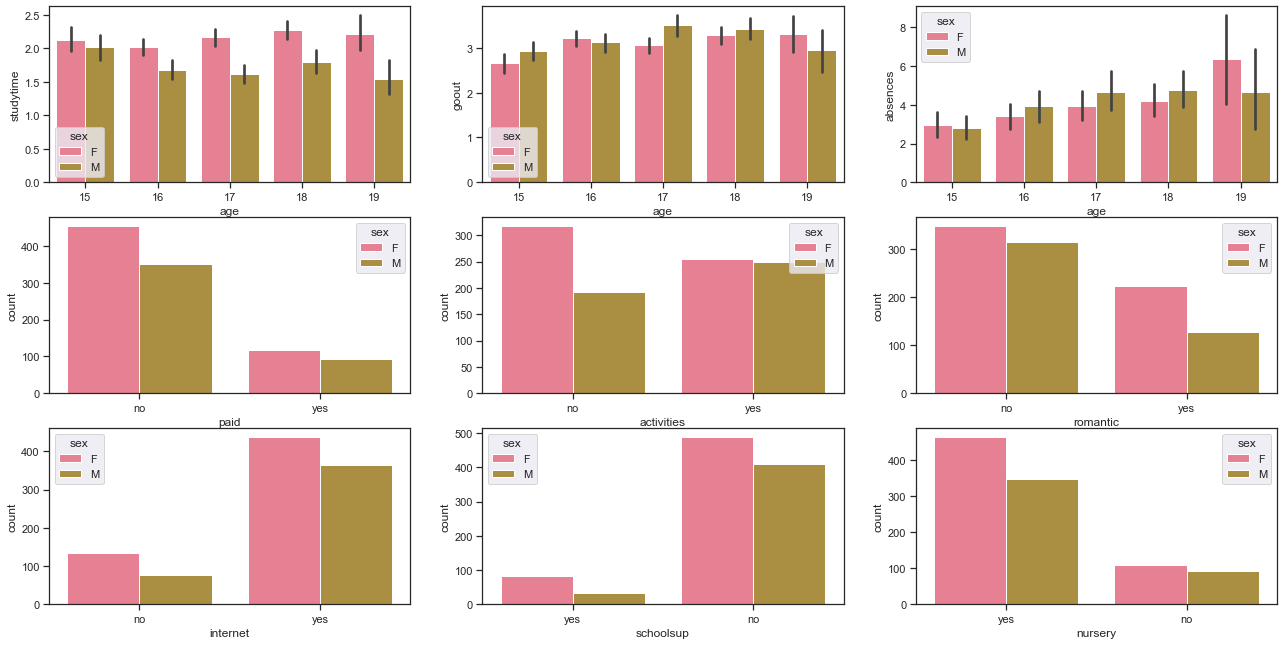

In [35]:
#A continuación, se utilizan gráficos referenciados a columnas del Dataframe para determinar si el sexo dictamina diferencias en las costumbres cuotidianas de los alumnos.

vi.multi_subplot(data=data)
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "sex_subplots.jpg")
#De base, a los 15 años en las gráficas studytime y absences, se puede ver que los sujetos femeninos tienen valores mínimamente por encima de los valores que presentan los sujetos masculinos. No obstante, con el paso de la edad, se observa como, significativamente, los sujetos masculinos dedican menos tiempo al estudio y más a salir y a no participar a clase. Es decir, los sujetos femeninos se mantienen más estables en el paso de edad mientras que los masculinos rompen con una tendencia que coincide con la que presentaba el consumo de alcohol. 

#Para justificar que el sexo es no es un factor únicamente biológico, sino que también social, se estudian las otras 6 tablas. En proporción, "paid"(clases privadas), "nursery"(asistencia a guardería) y "internet"(acceso a internet desde casa) son ligeramente similares. Sin embargo, también se encuentran diferencias en las otras: los sujetos femeninos participan a muchas menos actividades extraescolares("activities"), tienen pareja con más asiduidad ("romantic") y tienen muchos más casos de soporte educacional en la escuela ("schoolsup"), dato que lleva a pensar que no es solo una cuestión biológica la que dicta la dirección que marca la ingesta de alcohol, sino que el apoyo académico puede verse superior en los sujetos femeninos.

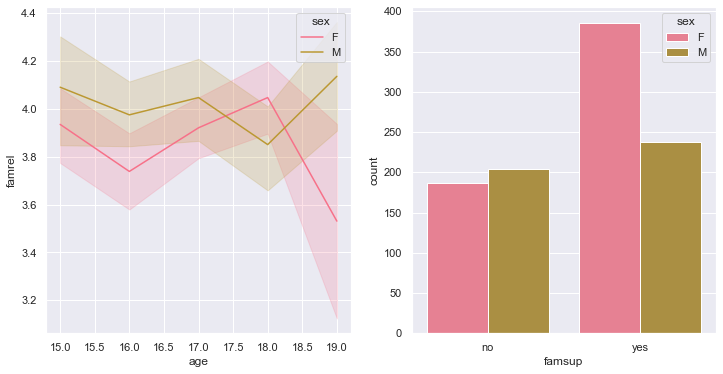

In [36]:
#Para confirmar lo último supuesto, trabajaremos con dos tablas más, que definen la situación de los alumnos, dividos por sexo y edad, con sus familiares. Como se puede analizar,no hay patrones de cambio en la relación de los alumnos con sus familiares ("famrel"), ni valores de diferencia significativos. Sin embargo, a pesar de tener relaciones similares, los sujetos femeninos tienen mucho más soporte educacional en sus padres que los sujetos masculinos, lo que lleva a pensar, que en realidad, el sexo no es una propiedad intrínseca que provoca que los sujetos beban más o no, sino que socialmente ya se aplican métodos distintos, o hay visiones distintas sobre el individuo por su sexo que implica diferencias educacionales en su experiencia vitalicia.

vi.line_count(data=data, x1="age", x2="famsup", y="famrel", hue="sex", figsize=(12,6))
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "fam_subplots.jpg")

In [37]:
#En resumen, la primera parte de la hipotesis se confirma, existen motivos significativos en las pautas educativas de los tutores para definir la tasa de consumo de alcohol del sujeto. Mayormente, por definición de los tiempos de estudio y tiempo libre y la varianza de soporte educacional según el sexo. En contraposición, se encuentra poca correlación con el tipo de población (urbana o rural), la edad del alumno, su situación sentimental, la situación de la relación familiar o la educación de los padres, por ejemplo. Para estos últimos casos, no se puede definir que haya pautas educativas clasificadas, pero si que las hay al permitir que los alumnos gocen de largos tiempos de libertad y no tengan la obligatoriedad o necesidad de llevar a cabo largos tiempos de estudio o solicitar ayuda académica. 

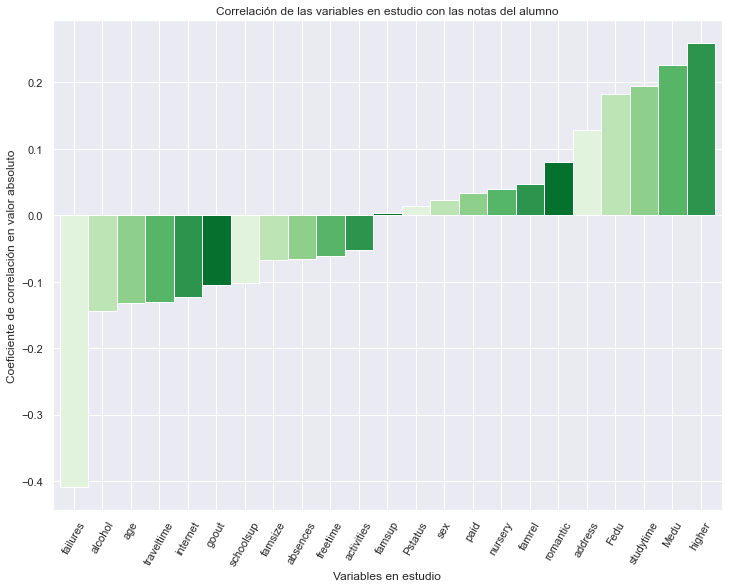

In [38]:
#La segunda parte de la hipotesis busca analizar la correlación entre el alcohol, las notas del grado, y, como punto final, las motivaciones que el alumno presenta para seguir formandose. En este caso se utiliza una tabla con correlaciones positivas y negativas.

#Como se ha especificado anteriormente, la correlación entre el alcohol y las notas no es muy significativa (-0.14), por lo que sí, existe una pequeña correlación y se puede justificar que si el alumno aumenta su ingesta de alcohol, hay riesgo de obtener peores notas, pero no tanta como para afirmar que los alumnos que beben obtienen peores notas. No obstante, "higher", el parámetro que estudia la motivación de los alumnos para seguir estudiando al finalizar, indica que a medida que aumenta las notas de los alumnos en el dataset, también lo hacen sus motivaciones académicas. Por lo que, se confirma también la segunda parte de la hipótesis.

vi.corr_onevalue_graphic_n(data=data_binary.corr()['grade'].sort_values(), variable = "las notas del alumno")
plt.savefig(".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "images" + os.sep + "correlation_grades.jpg")